In [4]:
!pip install keras==2.1.0

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os
os.chdir('/content/drive/My Drive/Analítica Predictiva/Trabajo final Predictiva/keras model')

In [7]:
import numpy as np
from keras.models import Model,Sequential,load_model
from keras.layers import InputLayer,Conv2D, UpSampling2D, InputLayer
from keras.preprocessing.image import img_to_array, load_img
from skimage.color import lab2rgb, rgb2lab
from matplotlib.pyplot import imshow
from keras.utils import plot_model

Using TensorFlow backend.


In [0]:
model = Sequential()
model.add(InputLayer(input_shape=(None, None, 1)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', strides=2))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(2, (3,3), activation='tanh', padding='same'))

# Finish model
model.compile(optimizer='rmsprop', loss='mse')


#Training large data by breaking it into batches
batch_size = 64
for i in range(624):
  print(i)
  images = ['dataset_color/ColorImagen{}.jpg'.format(num) for num in range(i*batch_size,(i+1)*batch_size)]
  X = np.empty([batch_size,256,256,1])
  Y = np.empty([batch_size,256,256,2])
  count = 0
  for filepath in images:
    try:
      image = img_to_array(load_img(filepath)) / 255
    except OSError:
      continue
    lab_image = rgb2lab(image)
    lab_image_norm = (lab_image + [0, 128, 128]) / [100, 255, 255]
    X[count,...] = lab_image_norm[:,:,0].reshape(1, 256, 256, 1)
    Y[count,...] = lab_image_norm[:,:,1:].reshape(1, 256, 256, 2)
    count +=1
  model.fit(X, Y, steps_per_epoch=100)  
  model.save('my_model_100_Iteracciones.h5')

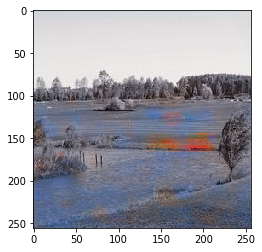

In [10]:
model = load_model('my_model_100_Iteracciones.h5')

image = img_to_array(load_img('dataset_escala_grises/Imagen113.jpg')) / 255
lab_image = rgb2lab(image)
lab_image.shape

lab_image_norm = (lab_image + [0, 128, 128]) / [100, 255, 255]

# The input will be the black and white layer
X = lab_image_norm[:,:,0]

# The Conv2D layer we will use later expects the inputs and training outputs to be of the following format:
# (samples, rows, cols, channels), so we need to do some reshaping
# https://keras.io/layers/convolutional/
X = X.reshape(1, X.shape[0], X.shape[1], 1)

output = model.predict(X)
cur = np.zeros((256, 256, 3))
cur[:,:,0] = X[0][:,:,0]
cur[:,:,1:] = output[0]


cur = (cur * [100, 255, 255]) - [0, 128, 128]
rgb_image = lab2rgb(cur)
imshow(rgb_image)